# TP6. Decision trees - Classification


## EX.1 -  Using Decision Trees to Diagnose Breast Cancer

Now that we have built our first decision trees, it's time to turn our attention to a real dataset: The Breast Cancer Wisconsin dataset <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)>.

In order to make the take feasible, the researchers performed feature extraction on the images, like we did in Chapter 4, Representing Data and Engineering Features. They went through a total of 569 images, and extracted 30 different features that describe the characteristics of the cell nuclei present in the images, including:

- cell nucleus texture (represented by the standard deviation of the gray-scale values)

- cell nucleus size (calculated as the mean of distances from center to points on the perimeter)

- tissue smoothness (local variation in radius lengths)

- tissue compactness

The goal of the research was then to classify tissue samples into benign and malignant (a binary classification task).

### Decision trees for Classification 

- the target variable uses a discrete set of values
- each node, or leaf, represent class labels while the branches represent conjunctions of features leading to class labels


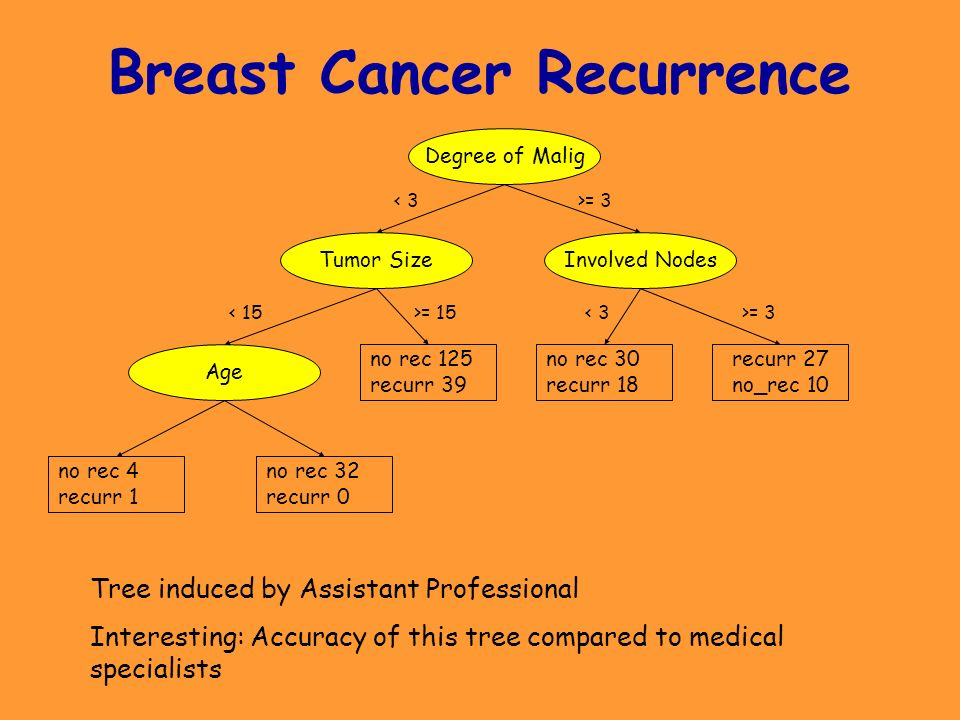

In [133]:
from IPython.display import Image
Image(filename = "tree_example.jpg", width = 600, height = 300)

#https://www.kaggle.com/code/nisasoylu/decision-tree-implementation-on-cancer-dataset#5.-Decision-Tree-with-Sklearn

### a) Loading the dataset

The full dataset is part of Scikit-Learn's example datasets:

In [134]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#from sklearn import datasets  
# read the dataset
#df=pd.read_csv('Breastcancer.csv', index_col=0)
df=pd.read_csv('Breastcancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As in previous examples, all data is contained in a 2-D feature matrix data.data, where the rows represent data samples, and the columns are the feature values:

In [135]:
df.shape

(569, 33)

In [136]:
#df.dtypes

In [137]:
#checking missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### b) EDA

With a look at the provided feature names, we recognize some that we mentioned above:

Since this is a binary classification task, we expect to find exactly two target names:

<Axes: xlabel='diagnosis'>

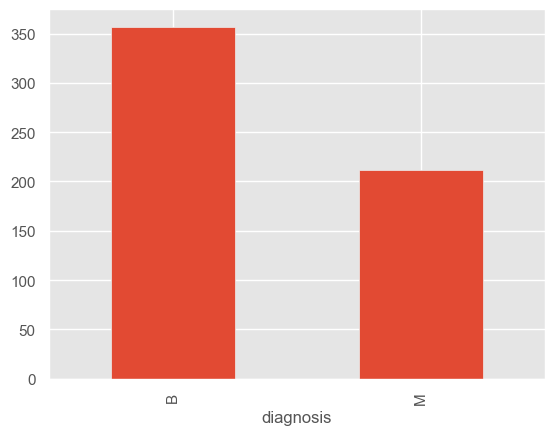

In [138]:
df.diagnosis.value_counts().plot.bar()

In [139]:
import plotly.express as px
fig = px.pie(df, values='radius_mean', names='diagnosis', title='Relation')
fig.show()

C:\Users\ElsaFG\anaconda3\envs\islp\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



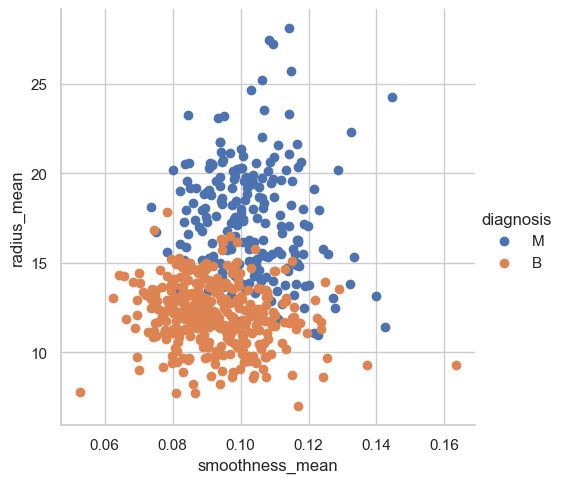

In [140]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.lmplot(y='radius_mean', x='smoothness_mean', hue='diagnosis', 
           data=df, 
           fit_reg=False, scatter_kws={'alpha':1})

In [141]:
#Retirar a coluna do id e da Unnamed: 32, cujos gráficos não fazem sentido

df=df.drop(["id","Unnamed: 32"],axis=1)

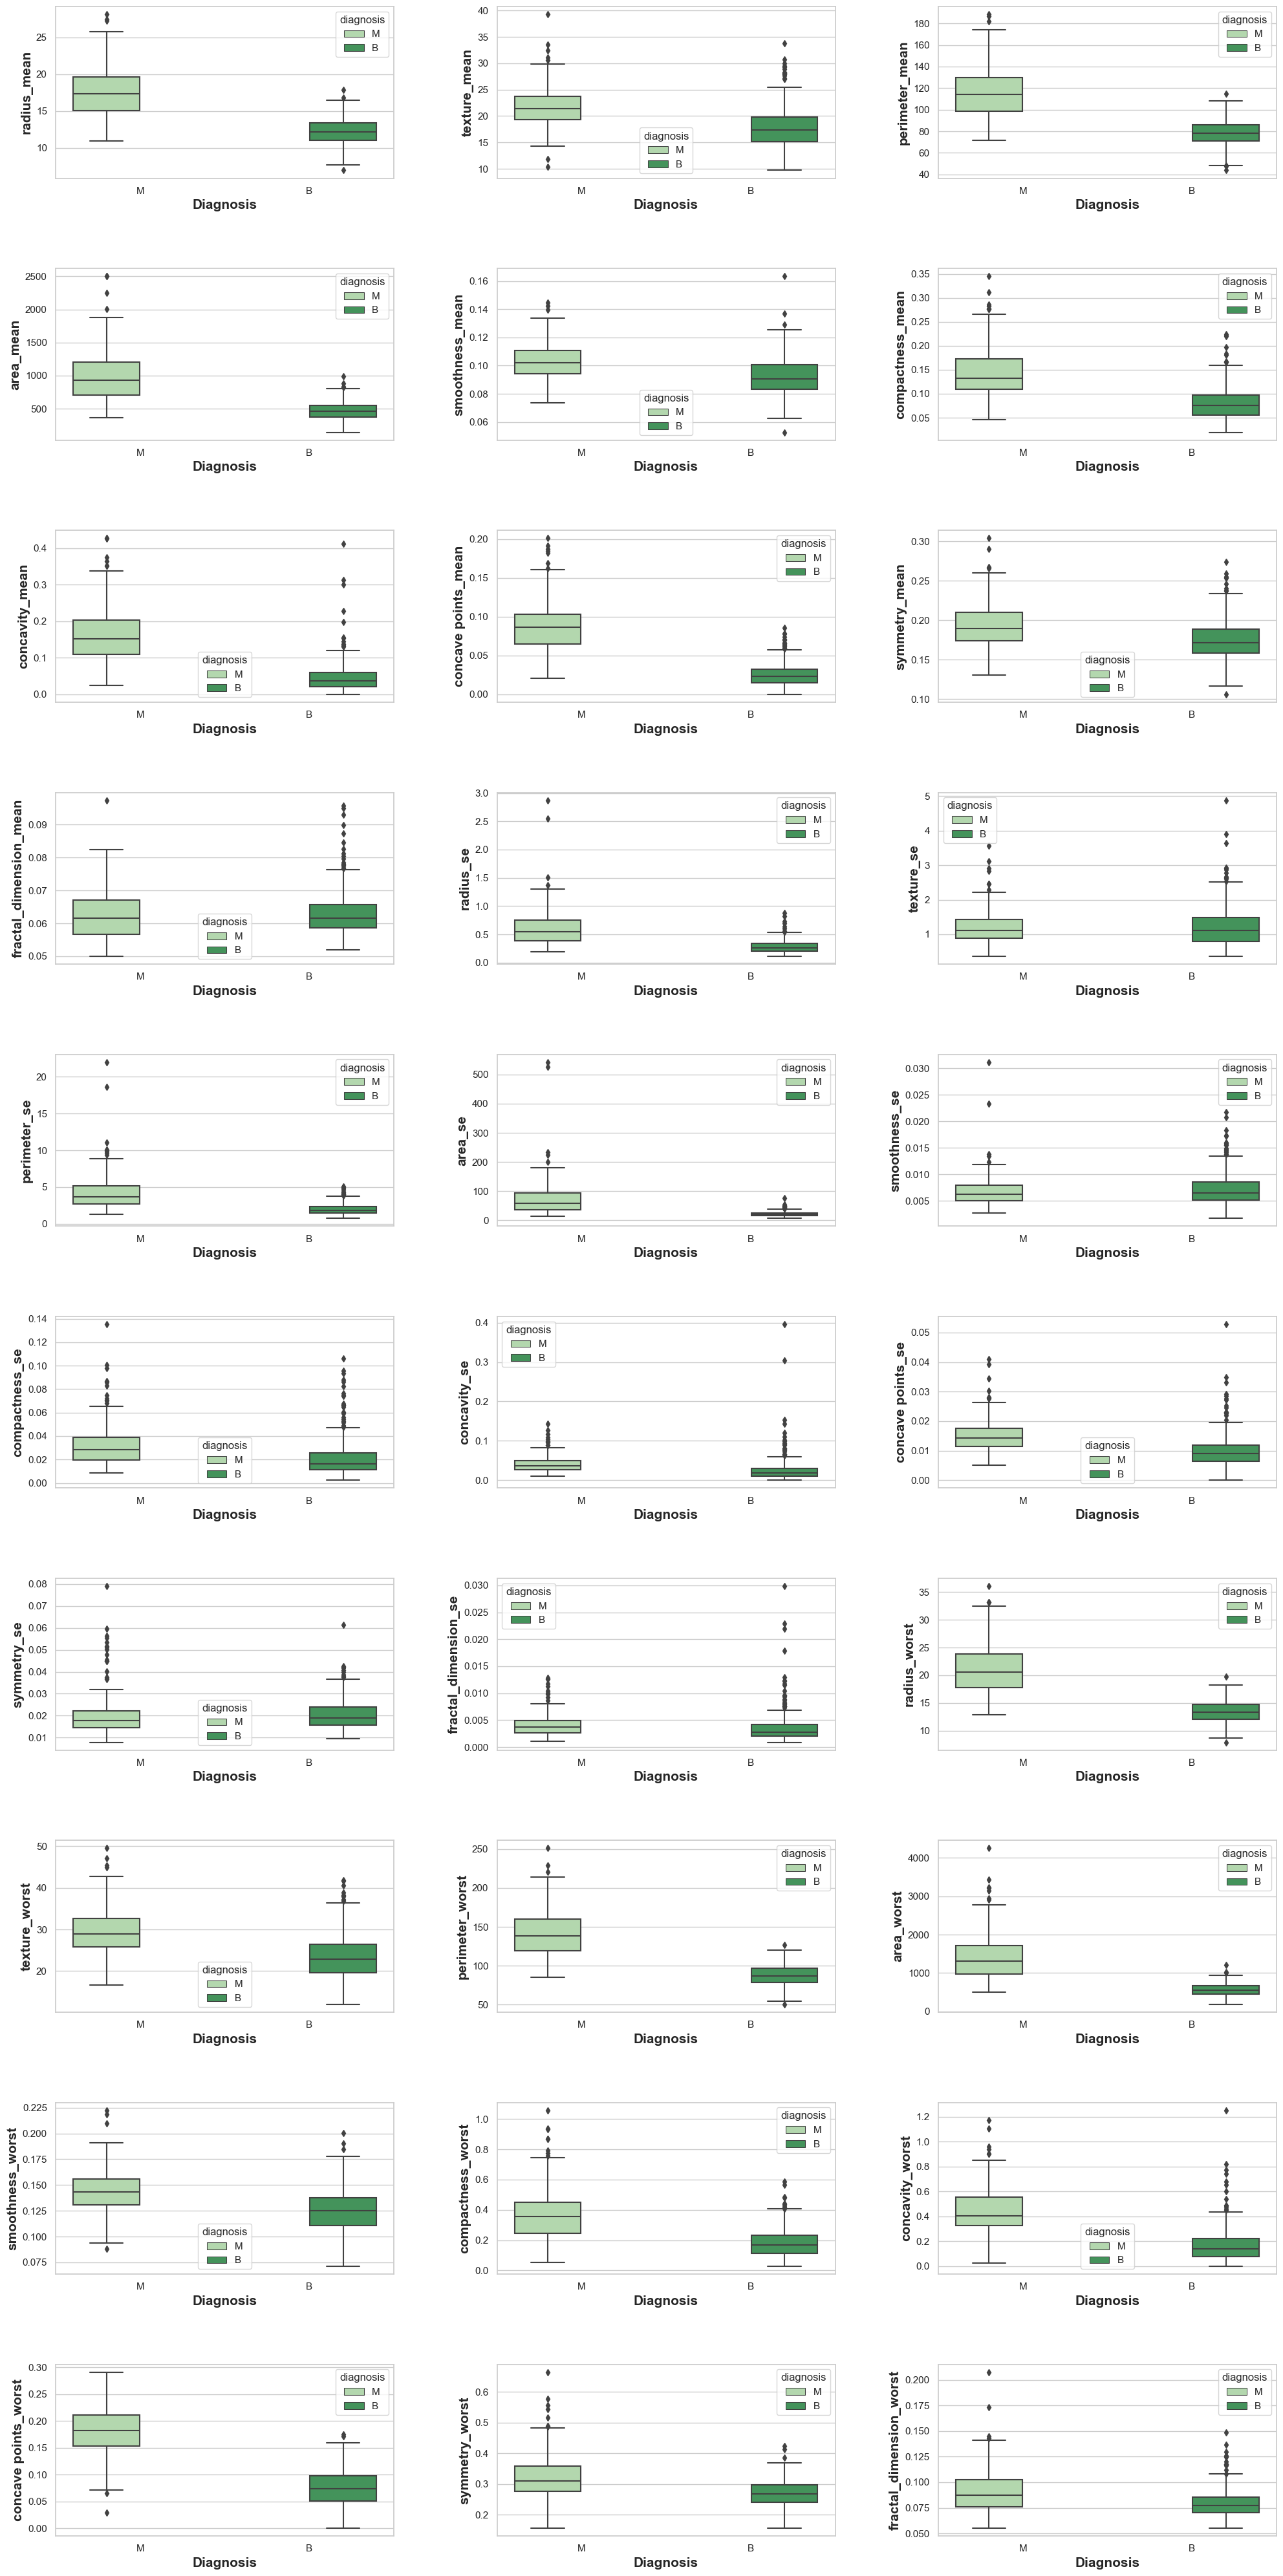

In [142]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    #sns.boxplot(x='diagnosis', y=col, data=df, ax=ax[i], palette='Greens', hue='diagnosis', legend=False)
    sns.boxplot(x='diagnosis', y=col, data=df, ax=ax[i], palette='Greens', hue='diagnosis')
    ax[i].set_xlabel('Diagnosis', fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel(col, fontsize = 15, fontweight = 'bold')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

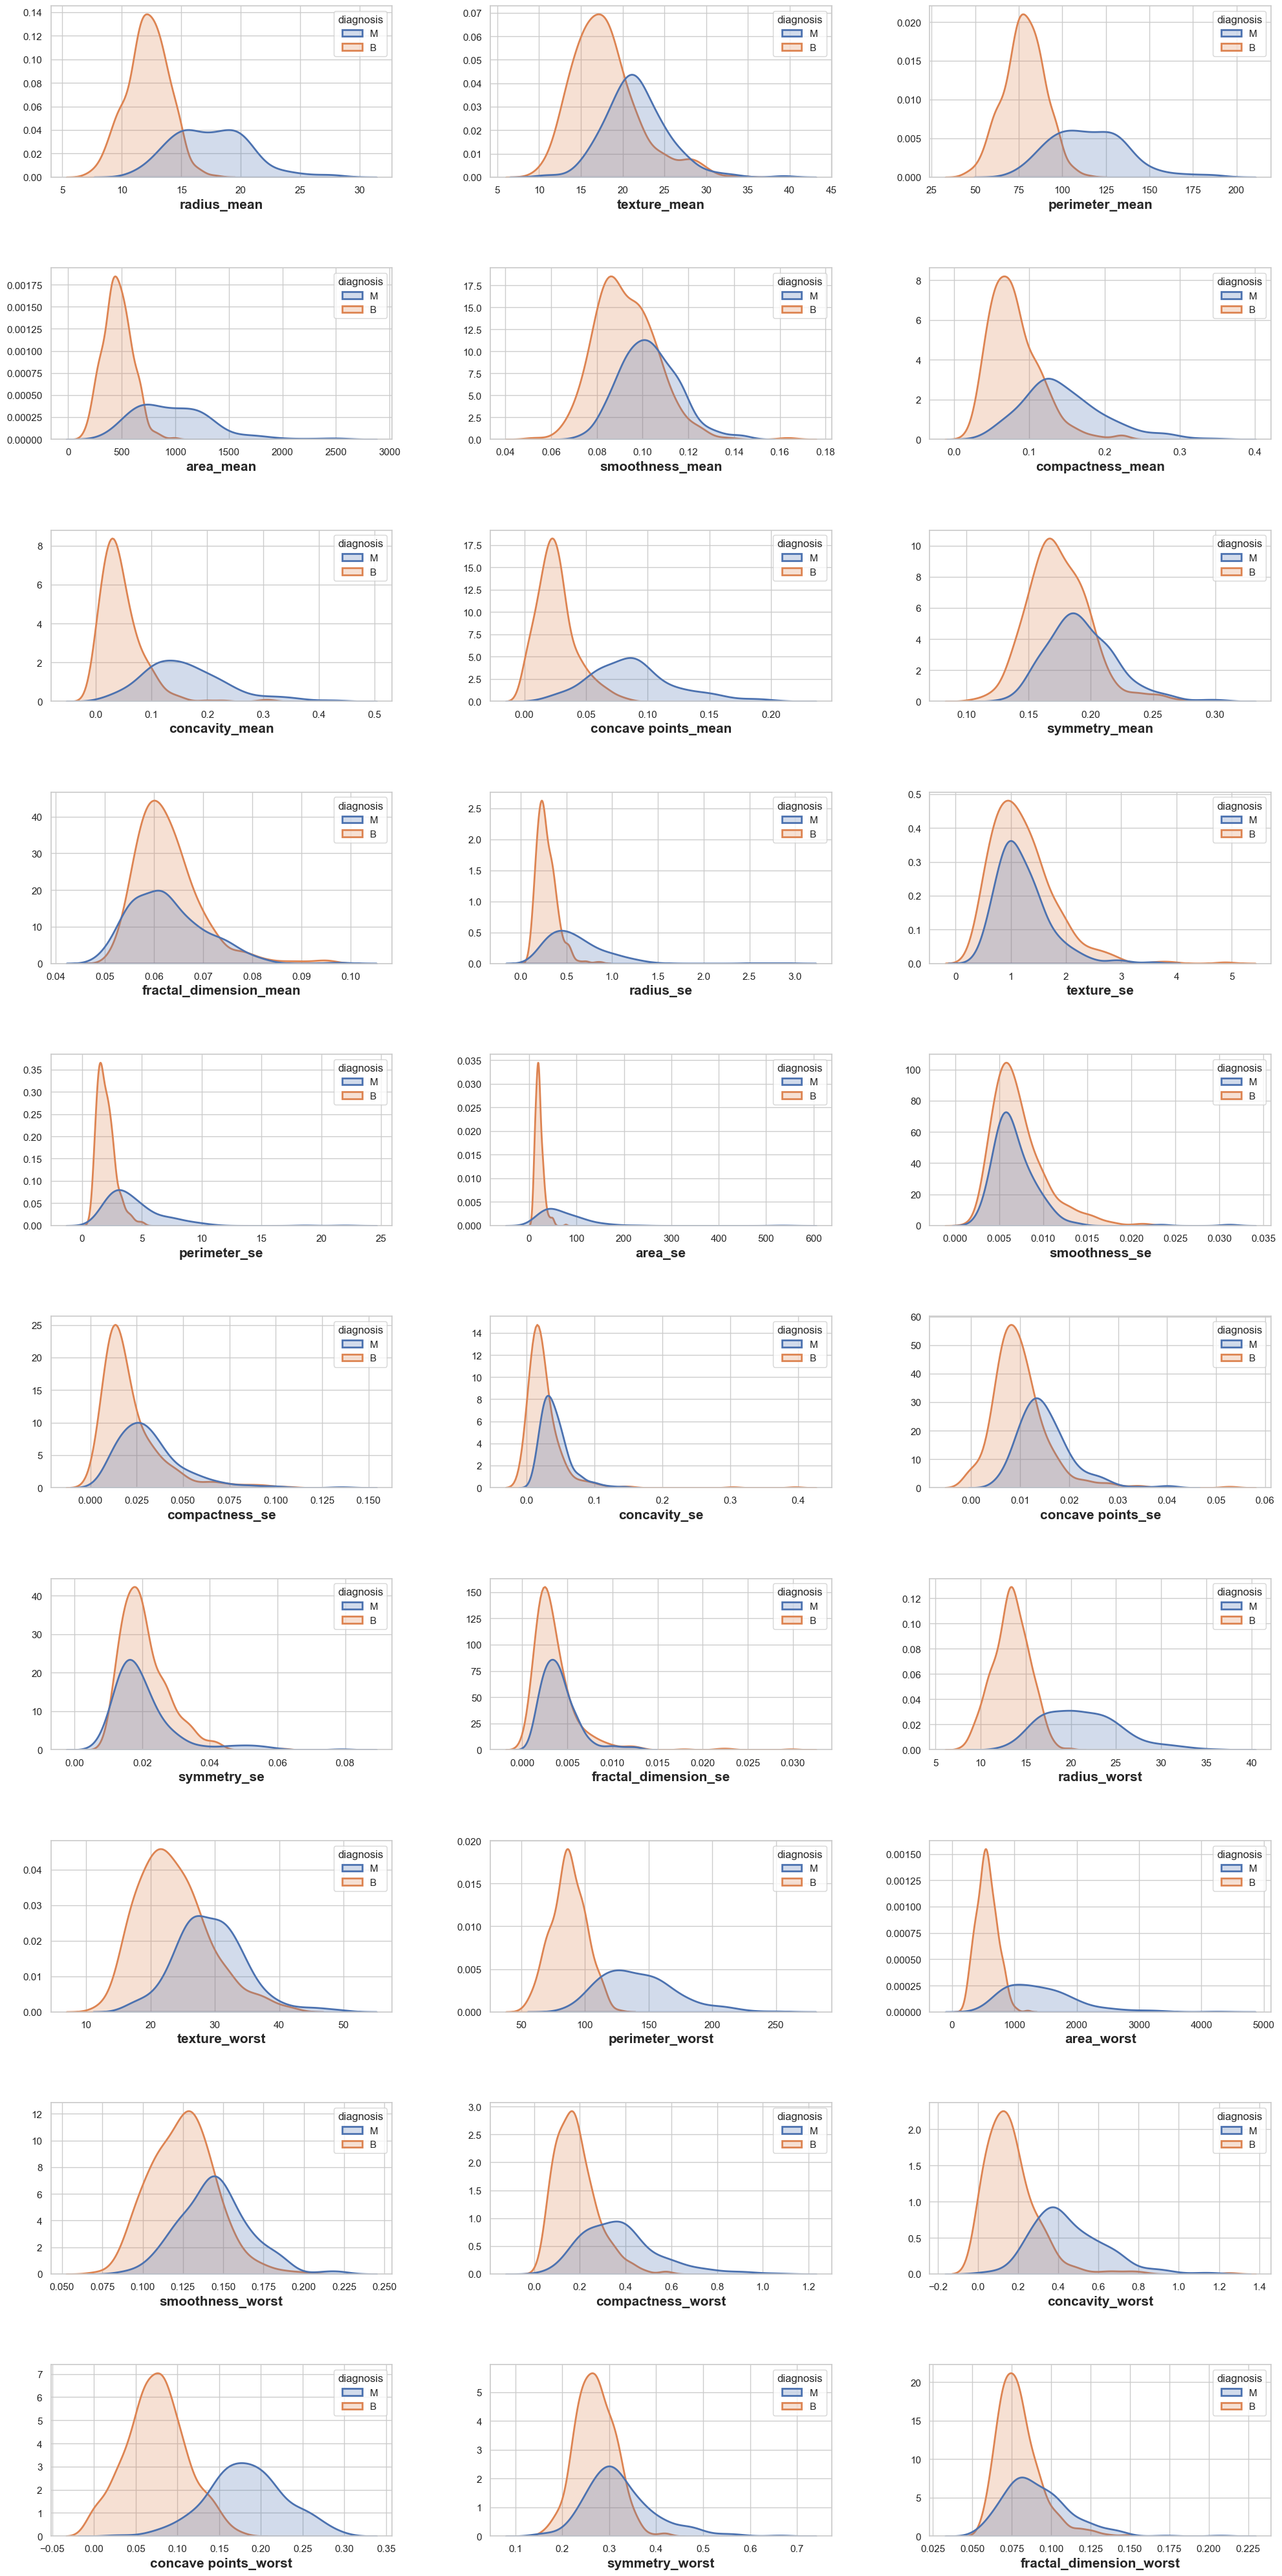

In [143]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw=2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')
    
plt.tight_layout(w_pad=5, h_pad=5)
plt.show()

### c) Holdout: split the dataset into training and test sets using a 70-30 split:

#### Data preparation

In [144]:
#target variable
y = df.loc[:,"diagnosis"].values
#feature variable
X = df.drop(["diagnosis"],axis=1).values

In [145]:
# our target variable has two categories, M and B. Scikit-learn likes to work with numpy arrays. 
#Let’s encode the target variable with label encoder. 
#Hint: This transformer should be used to encode target values, i.e. y, and not the input X.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#fit and transform the target variable
y = le.fit_transform(y)

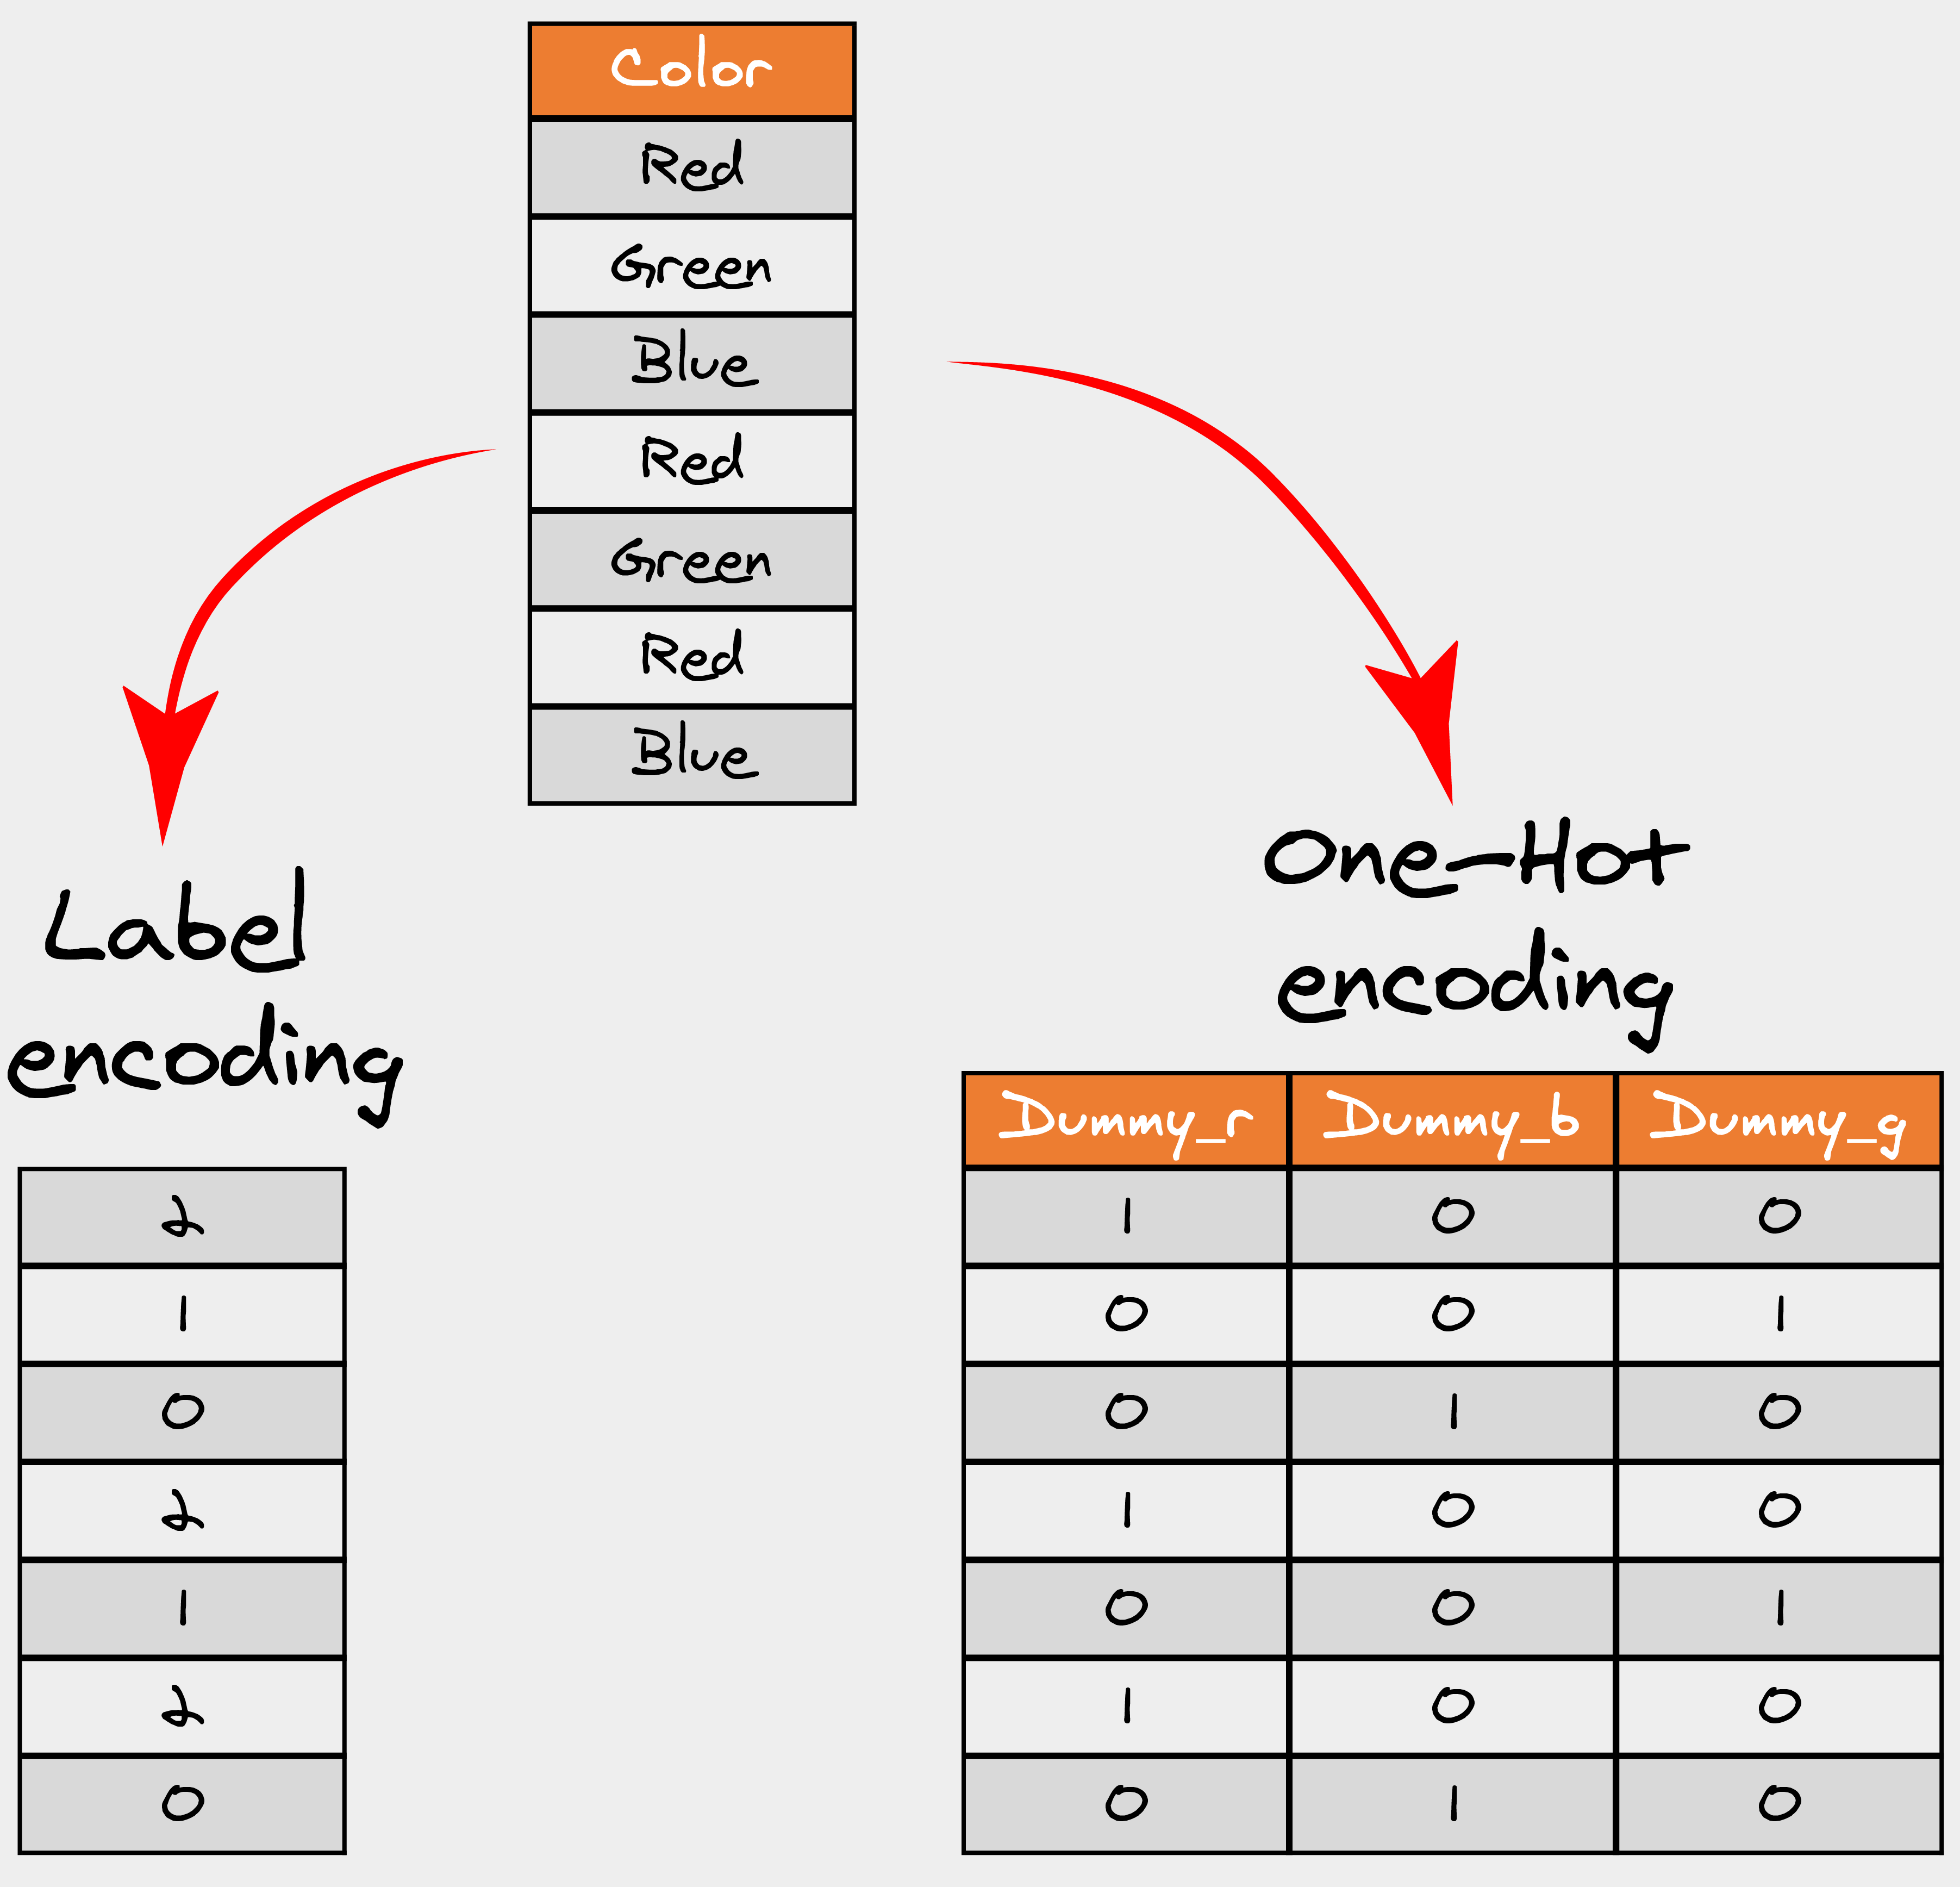

In [183]:
from IPython.display import Image
Image(filename = "Label_encod.png", width = 500, height = 300)

#Pandas: import pandas as pd; pd.get_dummies()
#Sklearn: from sklearn.preprocessing import OneHotEncoder; OneHotEncoder()    


In [147]:
#train and test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)


In [148]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [150]:
#Building the decision tree model

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 42)

#build the model with training sets
clf.fit(X_train, y_train)

# com scale
# model = dt.fit(scaler.transform(X_train), y_train)

DecisionTreeClassifier(random_state=42)

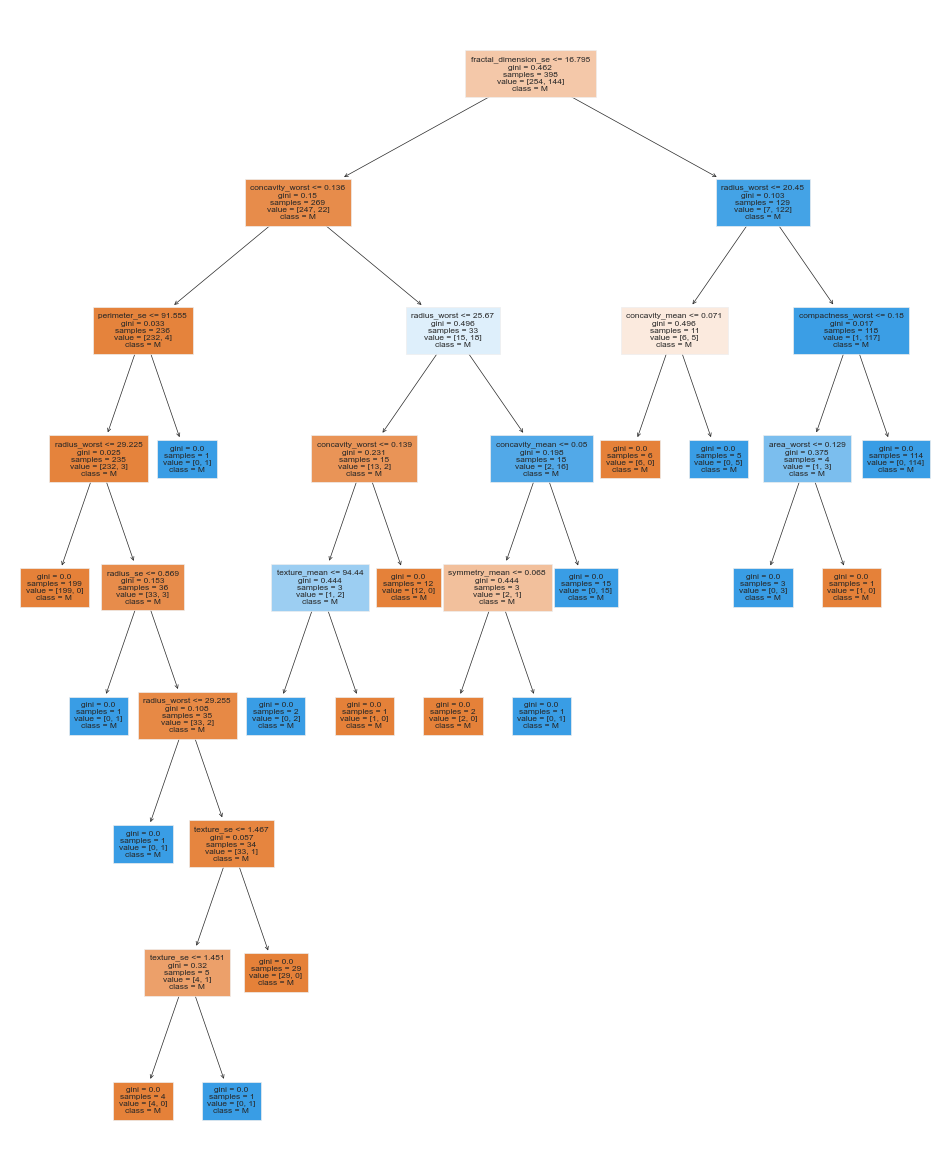

In [151]:
# tree visualization

from matplotlib import pyplot as plt
from sklearn.tree import plot_tree, export_text
from IPython.display import Image, display
%matplotlib inline
plt.style.use('ggplot')

# plot tree
plt.figure(figsize=(12,15))  # set plot size (denoted in inches)
plot_tree(clf, 
          feature_names = list(df.columns),
          class_names = list(df['diagnosis']),
          filled=True,                    
          fontsize=6);

Since we did not specify any pre-pruning parameters, we would expect this decision tree to grow quite large and result in a perfect score on the training set:

In [152]:
clf.score(X_train, y_train)

1.0

However, to our surprise, the test error is not too shabby, either:

In [153]:
clf.score(X_test, y_test)

0.9649122807017544

In [154]:
# Let’s predict the training and the test values with this model.

y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)

In [155]:
#Let’s take a look at the performance of the model on the training and test set. 
#To do this, we can use the accuracy_score function. 

from sklearn.metrics import accuracy_score

tree_train = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", tree_train)

tree_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", tree_test)

Train Accuracy: 1.0
Test Accuracy: 0.9649122807017544


In [156]:
# Lets also get the training error rate of the tree model
from sklearn.metrics import confusion_matrix

cmatrix = confusion_matrix(y_true = y_train, y_pred=clf.predict(X_train), labels=[True, False])
print(cmatrix)

error_rate = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Training Error Rate:", error_rate)


[[144   0]
 [  0 254]]
Training Error Rate: 0.0


In [157]:
# Lets compute the error rate of the tree model

ypred = clf.predict(X_test)
cmatrix = confusion_matrix(y_true=y_test, y_pred=ypred, labels=[True, False])
print(cmatrix)
error_rate_test = (cmatrix[0,1]+cmatrix[1,0])/cmatrix.sum()
print("Test Error Rate:", error_rate_test)

[[ 64   4]
 [  2 101]]
Test Error Rate: 0.03508771929824561


### d) Confusion matrix

0.9649122807017544

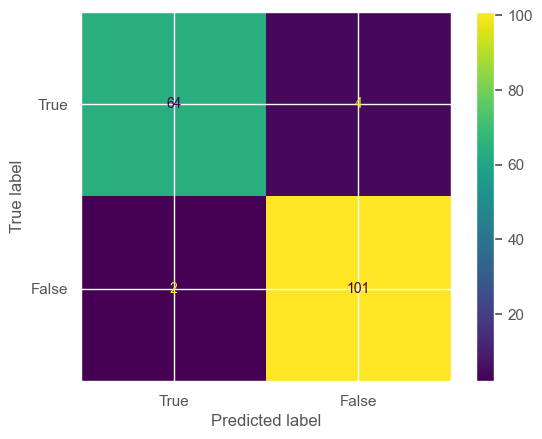

In [158]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

disp = ConfusionMatrixDisplay(confusion_matrix=cmatrix, display_labels=[True, False])
disp.plot()

accuracy_score(y_test,ypred)

### f) Confusion matrix implementation - matriz_confusao(actual, predicted)

Para calcular a matriz de confusão para um problema de classificação 2-classes:

- True positives (TP): O número de casos corretamente classificados para a classe positiva.
- True negatives (TN): O número de casos corretamente classificados para a classe negativa.
- False positives (FP): O número de casos incorretamente classificados para a classe positiva.
- False negatives (FN): O número de casos incorretamente classificados para a classe negativa.


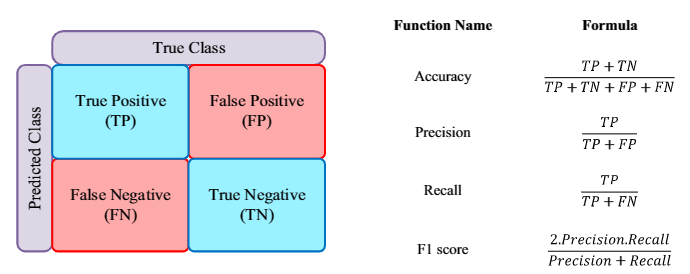

In [159]:
## Metrics - 2 classes

Image(filename = "matriz_conf_metricas.png", width = 600, height = 300)

#### Metrics for Performance Evaluation (Medidas de desempenho)

- Accuracy: Rate of correct examples (out of total examples)

- Error rate: Rate of wrong examples (out of total examples)

- Precision: rate of positive examples classified correctly, among all predicted as positive

- Recall (sensitivity): success rate in the positive class (of the total positives, how many were detected)

- F1:. Harmonic average of precision and recall with the aim of giving a unique measure that equally values the mistakes made in either direction (FP or FN)

  - F1 =  2 x Precision x Recall/(Precision + Recall)


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.97      0.94      0.96        68

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



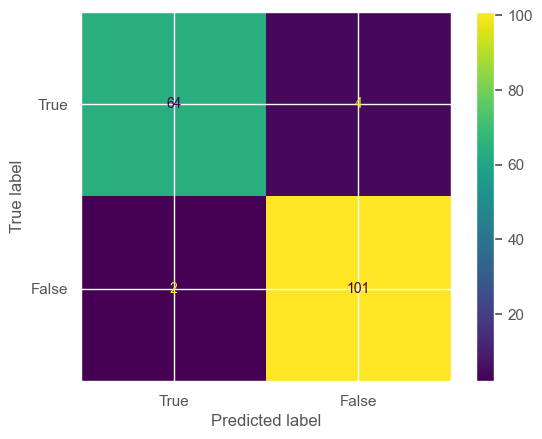

In [160]:
# confusion matrix in sklearn

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def matriz_confusao(actual, predicted):

    # outcome values order in sklearn
    matrix = confusion_matrix(y_true = actual, y_pred = predicted, labels=[True, False])
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[True, False])
    disp.plot()

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual,predicted)
    print('Classification report : \n',matrix)

# chamada à função
res = matriz_confusao(y_test,ypred)

### e) Holdout - 10x

In [161]:
# Holdout
#from sklearn.metrics import accuracy_score

# Initialize your machine learning model 

model = DecisionTreeClassifier()

scores = []

# Iterate through each fold
for i in range(10):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)
    
    # Append the fold score to the list of scores
    scores.append(fold_score)
    
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("Holdout Scores:", scores)
print("Mean Accuracy:", mean_accuracy)

Holdout Scores: [0.9181286549707602, 0.9239766081871345, 0.9298245614035088, 0.9064327485380117, 0.9064327485380117, 0.9181286549707602, 0.9532163742690059, 0.9298245614035088, 0.9122807017543859, 0.9122807017543859]
Mean Accuracy: 0.9210526315789472


### g) K-fold cross validation

In [162]:
# K-Fold Cross Validation - implementation
#
# Splitting the Data into Folds

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size : (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 5

# Get the fold indices
fold_indices = kfold_indices(X, k)

In [163]:
# Performing K-Fold Cross-Validation
#from sklearn.metrics import accuracy_score

# Initialize your machine learning model 

model = DecisionTreeClassifier()

scores = []
prevs_folds=[]
y_folds=[]
# Iterate through each fold
for train_indices, test_indices in fold_indices:
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(y_test, y_pred)
    
    # Append the fold score to the list of scores
    scores.append(fold_score)


    # Append the prevs and labels of the test set
    prevs_folds.append(y_pred)
    y_folds.append(y_test)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
std_accuracy=np.std(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)
print("Standart Deviation:", std_accuracy)

K-Fold Cross-Validation Scores: [0.8672566371681416, 0.9203539823008849, 0.9557522123893806, 0.9557522123893806, 0.8495575221238938]
Mean Accuracy: 0.9097345132743364
Standart Deviation: 0.04421237520990018


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       356
           1       0.87      0.89      0.88       209

    accuracy                           0.91       565
   macro avg       0.90      0.91      0.90       565
weighted avg       0.91      0.91      0.91       565



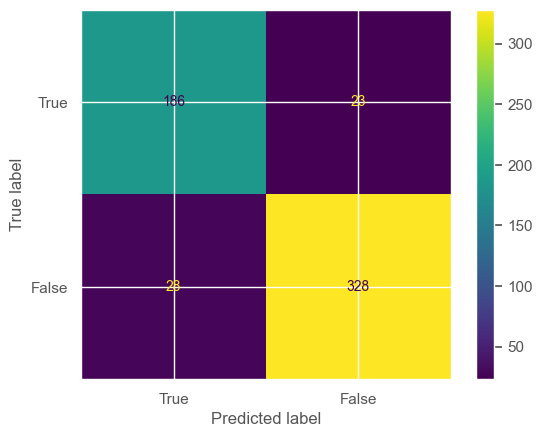

In [164]:
resultados = matriz_confusao(np.concatenate(y_folds), np.concatenate(prevs_folds))

### Hyperparameter tuning / Overfitting 

In [165]:
# The score on the training set is 100%, but the score on the test set is 95%. This means that our model has an overfitting problem. 
# Note that the decision tree model learned the training set very well, but the model cannot generalize. 
# To overcome the overfitting problem, we control the complexity of a tree. We can start to specify the max_depth parameter 
# which controls the maximum number of levels. The default value for the max_depth parameter is None, which means that the tree can grow as large as possible. 
# We can try a smaller value and compare the results. Let me specify the max_depth parameter.

In [166]:
# Now we want to do some model exploration. For example, we mentioned above that the depth of a tree influences its performance. 
# If we wanted to study this dependency more systematically, we could repeat building the tree for different values of max_depth:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

import numpy as np
max_depths = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [167]:
# For each of these values, we want to run the full model cascade from start to finish. 
# We also want to record the train and test scores. We do this in a for loop:

train_score = []
test_score = []
for d in max_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

In [168]:
# We can plot the scores as a function of the tree depth using Matplotlib:

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

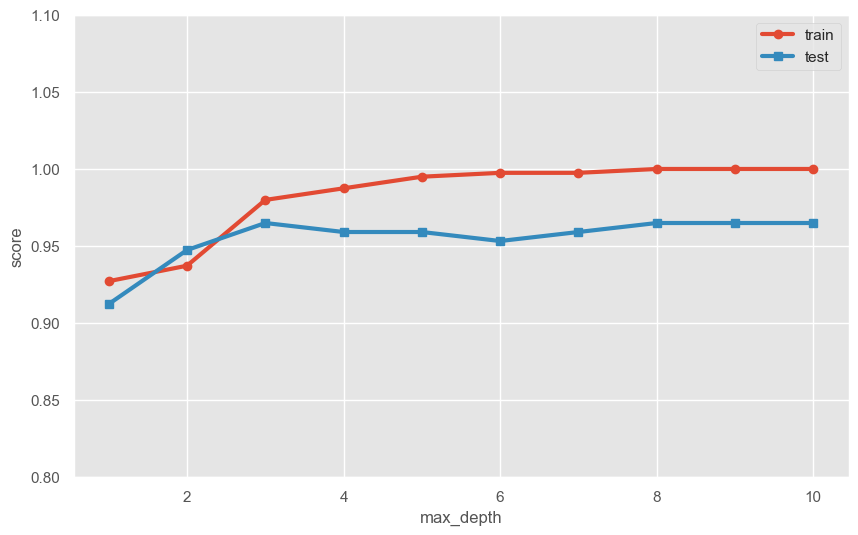

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.8, 1.1)
plt.legend();

In [170]:
# What about the minimum numbers of samples required to make a node a leaf node? (another Hyperparameter)

train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    clf = DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    clf.fit(X_train, y_train)
    train_score.append(clf.score(X_train, y_train))
    test_score.append(clf.score(X_test, y_test))

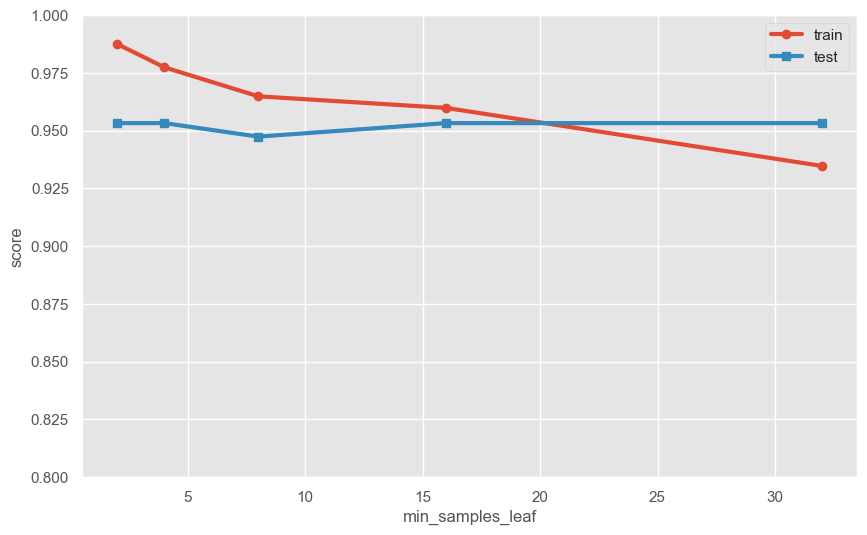

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.8, 1)
plt.legend()